In [1]:
import numpy as np
import pandas as pd
import mne
import scipy.io
from python_speech_features import mfcc
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# mat = scipy.io.loadmat("./data/Pantelis_PAS_preprocessed/pantelis_PAS1.mat")
# mat.keys()
# mat['data_tobesaved']

In [3]:
data = mne.io.read_raw_eximia("./data/Pantelis_PAS/Pantelis_PAS1.nxe", preload=True)
# print(data)
# print(data.info)

Loading Pantelis_PAS1.nxe
Reading 0 ... 610570  =      0.000 ...   421.083 secs...


In [4]:
Fs = data.info["sfreq"]

df_sensor_data = pd.DataFrame(data[:][0], index=data.ch_names).T

ch_names_totake = data.ch_names[4:]

In [5]:
df_sensor_data.head()

,GateIn,Trig1,Trig2,EOG,Fp1,Fpz,Fp2,AF1,AFz,AF2,...,P4,P8,P10,PO3,POz,PO4,O1,Oz,O2,Iz
0,0.039673,0.033570,0.041199,84.306096,394.140536,393.453880,338.750286,416.647593,413.748379,345.769436,...,304.951553,271.610590,233.615625,258.182650,309.224079,257.419699,279.087510,295.796139,279.240101,240.711070
1,0.035096,0.041199,0.035096,78.965438,299.000534,292.973220,240.787366,315.098802,315.938048,256.504158,...,298.161288,268.635080,224.841688,258.182650,324.330510,267.566949,293.812467,312.733654,306.324865,258.106355
2,0.038148,0.035096,0.041199,75.913634,342.717632,333.562219,285.801480,361.333639,371.786069,316.090639,...,381.399252,351.415274,300.984207,342.107271,395.971618,344.396124,371.938659,392.156863,383.154040,326.466773
3,0.041199,0.038148,0.041199,70.954452,397.497520,390.325780,340.123598,416.037232,425.574121,366.979477,...,409.552148,379.110399,330.586709,369.192035,411.306935,369.268330,394.369421,415.197986,399.862669,350.728618
4,0.041199,0.038148,0.036622,64.850843,408.178836,410.772869,357.747768,433.279927,435.416190,379.034104,...,390.478370,360.723278,314.488441,347.066453,383.840696,345.998322,364.843214,385.824369,369.573510,324.711986


In [6]:
df_locs = pd.read_excel("./data/docs/Nexstim_chanlocs.xlsx")

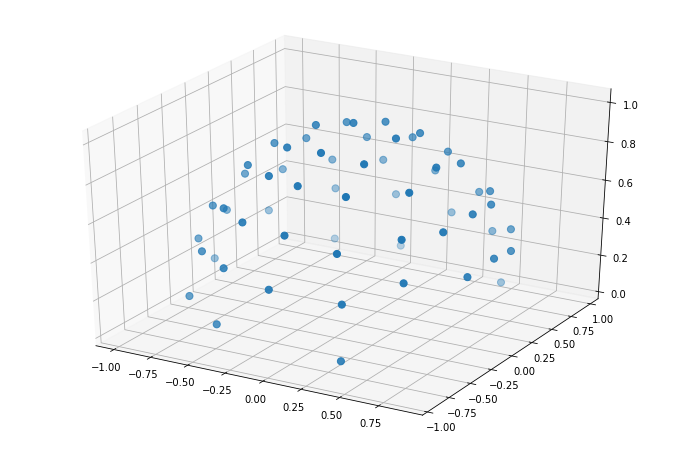

In [7]:
x_eeg_loc = df_locs["X"].values
y_eeg_loc = df_locs["Y"].values
z_eeg_loc = df_locs["Z"].values

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.scatter3D(x_eeg_loc, y_eeg_loc, z_eeg_loc, s=50)
plt.show()

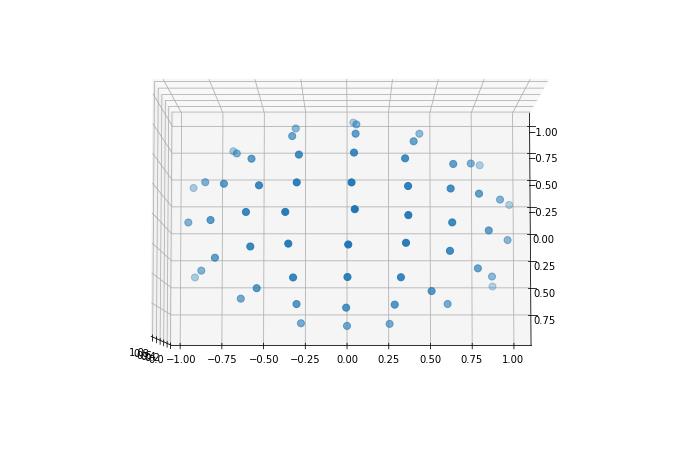

In [8]:
ax.view_init(85, 0)
fig

In [9]:
cur_ch = ch_names_totake[0]

sig = df_sensor_data[cur_ch].values

In [10]:
mfcc_feat = mfcc(sig.reshape(-1,1), samplerate=Fs, nfilt=3, numcep=3)
mfcc_feat.shape

(40704, 3)

In [11]:
mfcc_winlen = 0.025
n_samp = np.int(np.round(mfcc_winlen * Fs))
n_samp

36

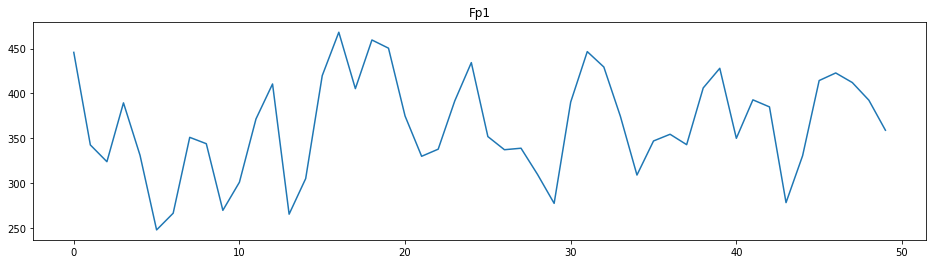

In [12]:
n_samp = 50

i = 102
sig_wind = sig[i*n_samp:(i+1)*n_samp]

plt.figure(figsize=(16,4))
plt.plot(range(len(sig_wind)), sig_wind)
plt.title(cur_ch)
plt.show()

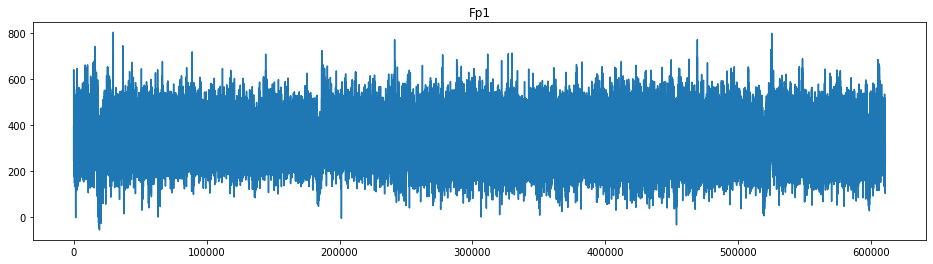

In [13]:
plt.figure(figsize=(16,4))
plt.plot(range(len(sig)), sig)
plt.title(cur_ch)
plt.show()

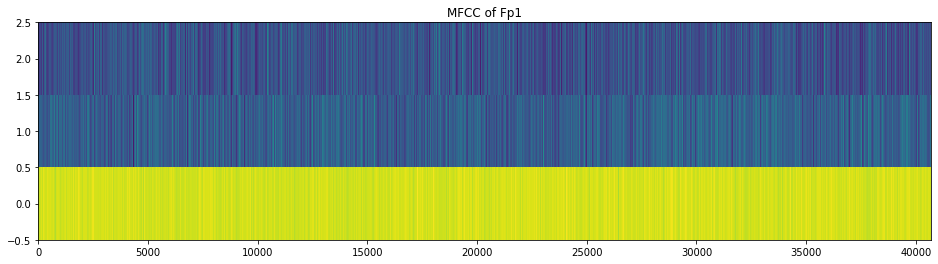

In [14]:
plt.figure(figsize=(16,4))
plt.imshow(np.swapaxes(mfcc_feat, 0 ,1), interpolation='nearest', origin='lower', aspect='auto')
plt.title('MFCC of ' + cur_ch)
plt.show()

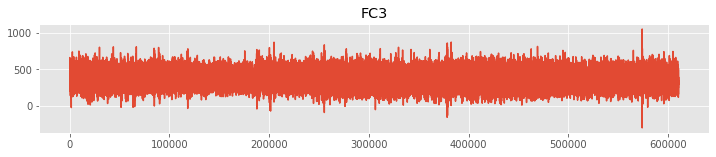

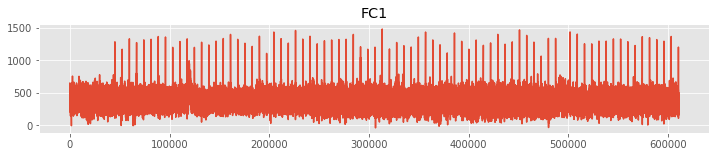

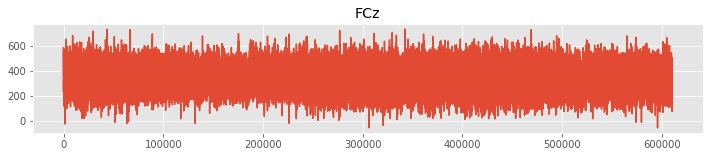

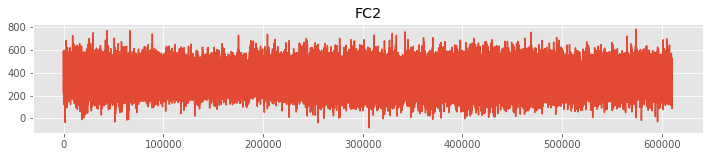

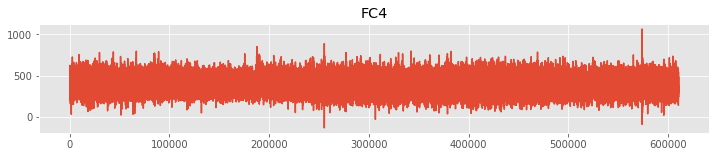

In [16]:
plt.style.use("ggplot")

for n in data.ch_names[20:25]:
    x = df_sensor_data[n].values
    fig = plt.figure(figsize=(12,2))
    plt.plot(range(len(x)), x)
    plt.title(n)
    plt.show()